<h1 style="font-family:impact;"><font size="6">Predator. </font><u><font color='red'><font size="6">Prey.</u></font></h1>
<p style="font-family:garamond;"><font size="4">Expanding the Lotka-Volterra Model</font></p>
<p style="font-family:garamond;"><font size="3">Nicholas Batista, 12/15/2015</font></p>

<h1 style="font-family:garamond;"><font size="5">Introduction: The Lotka-Volterra Model</font></h1>

<p style="font-family:garamond;"><font size="4">The Lotka-Volterra model is a simple predator-prey model developed and published independently by two mathematicians, Alfred J. Lotka and Vito Volterra. Their initial derivations were inspired by applications in the fields of physical chemistry and biology, respectively.</font></p>

<img src="./files/lotka-volterra.PNG" alt=Lotka-Volterra align="middle">
<div style="font-family:times new roman;"><div align="center"><font size="2">Figure 1: Alfred J. Lotka (Left) & Vito Volterra (Right). Why so serious, guys?</font></div>

<p style="font-family:garamond;"><font size="4">In 1910, Lotka developed a simple model for population growth in autocatalytic reactions (where reactants also exist as products). The following decade, he elaborated on his initial model and developed a pair of differential equations to describe a two-species biological system.<sup>[1]</sup></font></p>

<p style="font-family:garamond;"><font size="4">During the first World War, Austro-Italian conflict led to a reduction of fishing in the Adriatic Sea. Statistical reports from fish markets at this time indicated an increase in the number of predatory fish species relative to the number of prey fish species. In 1925, Volterra had developed a pair of differential equations to model this biological system and explain the observed population effects.<sup>[2]</sup></font></p>

<img src="./files/grouper-bream.PNG" alt=Grouper-Bream align="middle">
<div style="font-family:times new roman;"><div align="center"><font size="2">Figure 2: Giant Grouper (Left) & Gilt-Head Bream (Right), Two species of Adriatic Predatory Fauna</font></div>
<div style="font-family:times new roman;"><div align="center"><font size="2">Grouper shown swimming with smaller species</font></div>
<div style="font-family:times new roman;"><div align="center"><font size="2">Bream shown puckering for a kiss in a Venetian fish market &#9829;</font></div>

<h1 style="font-family:garamond;"><font size="5">Problem: Computing Two-Species Population Dynamics Over Time</font></h1>

<p style="font-family:garamond;"><font size="4">Both Lotka and Volterra published the same, derived result. The Lotka-Volterra model is a basic differential equation model, consisting of a pair of coupled, first-order, non-linear, differential equations:</font></p>

<img src="./files/lotka-volterra-equation-pair.PNG" alt=Lotka-Volterra-Equations align="middle" height="150" width="233">
<div style="font-family:times new roman;"><div align="center"><font size="2">Figure 3: The Lotka-Volterra Equations <sup>[3]</sup></font></div>

<p style="font-family:garamond;"><font size="4">Shown above, the Lotka-Volterra equations describe the oscillation between prey and predator populations in a system. "F" refers to the population of prey (food), and "C" refers to the population of predators (consumers). The rate of change of the prey population (dF/dt) is evaluated simply as the rate at which prey reproduce minus the deaths to predator attacks. Similarly, the rate of change of the predator population (dC/dt) is related to the rate at which predators can reproduce and the rate predators die without prey. Imagine the predator and prey populations (F & C) as existing in a specific area/volume; greater populations lead to higher frequencies of interactions between the different pairings of the two species.</font></p>


<p style="font-family:garamond;"><font size="5"><u>Variables:</u></font></p>
<p style="font-family:garamond;"><font size="4">F &#8594; Population of Prey Species (Food)</font></p>
<p style="font-family:garamond;"><font size="4">C &#8594; Population of Predator Species (Consumers)</font></p>
<p style="font-family:garamond;"><font size="4">r &#8594; Prey birthing rate in the absense of predators</font></p>
<p style="font-family:garamond;"><font size="4">a &#8594; Predator attack frequency, hunting range/time</font></p>
<p style="font-family:garamond;"><font size="4">&#949; &#8594; Conversion efficiency of prey into new predators</font></p>
<p style="font-family:garamond;"><font size="4">&#956; &#8594; Predator death rate in the absense of prey</font></p>


<p style="font-family:garamond;"><font size="4">The Lotka-Volterra model operates under a number of assumptions about the environment and the two species. First, the prey population grows exponentially in the absense of predators. Similarly, the predator population exhibits an exponential decline in the absense of prey. Predation reduces the population of prey, and therefore reduces the prey's growth rate proportional to the population of both species. Also notice that the predator population increases relative to available prey. More frequent predation can be thought of as yielding more energy for the growth of predator population, based on the conversion efficiency, &#949;.<sup>[4]</sup></font></p>

<p style="font-family:garamond;"><font size="4">It can also be assumed that prey can always find food to avoid starvation, and that predators have a limitless appetite. Finally, notice that by factoring out F and C in the equations in Figure 3, the rate of change of both populations can be shown to be directly proportional to their size. This model does not include environmental factors that could favor either species, and does not consider the adaptation of either species to survive.<sup>[5]</sup></font></p>

<h1 style="font-family:garamond;"><font size="5">Solution: Explicit Runge-Kutta Method</font></h1>

<img src="./files/runge-kutta.PNG" alt=Runge-Kutta, 4th Order, Explicit Method align="middle">
<div style="font-family:times new roman;"><div align="center"><font size="2">Figure 4: Runge-Kutta, 4th Order, Explicit<sup>[6]</sup></font></div>

<p style="font-family:garamond;"><font size="3">The explicit Runge-Kutta method is an easily implemented, stable numerical integration method. This method is appropriate to evaluate the coupled pair of Lotka-Volterra equations. The specific method used throughout this notebook is the 4th order, explicit, Runge-Kutta method. This method possesses 5th order truncation error. "y" refers to the array of population values over time, while "h" refers to the time step size.</font></p>

In [4]:
import numpy as np
import math
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['font.size']=16

r=0.1#0.5          #Exponential birth rate of prey sans predators
a=0.1#1.0          #Predator attack frequency (search area over time)
epsilon=0.5#0.5    #Conversion efficiency, use of prey to form new predators
mu=0.2#0.1         #Death rate of predators sans prey
F_C=np.array([15,5],dtype=float)   #Initial Population of Prey and Predators, respectively
t_f=1000              #simulation run time
dt=0.1              #time step (s)
nt=t_f/dt
n_t=int(nt)
t=np.linspace(0,t_f,num=n_t+1)

def lotka_volterra_basic(t,init):
    """Coupled Lotka-Volterra Equations
        Basic Form
        
        Returns right-hand side of the system of equations
        
        Input:
        t--simulation time steps, array
        init--Population count, initially F_C
        """
    F,C=init
    d_F=(r*F)-(a*F*C)
    d_C=(epsilon*a*F*C)-(mu*C)
    return np.array(([d_F, d_C]), dtype=float)

def runge_kutta_explicit(f,y_0,t):
    """ Runge-Kutta Numerical Method
        4th Order, Explicit
        
        Inputs:
        f--Coupled Lotka-Volterra
        y_0--Current Population Values, Initially F_C
        t--simulation time steps, array
        """
    n=len(t)
    y=np.zeros((n,2))
    y[0]=y_0
    for i in range(n-1):
        t_n=t[i]
        y_n=y[i]
        k1=dt*f(t_n,y_n)
        k2=dt*f(t_n+(dt/2),y_n+(k1/2))
        k3=dt*f(t_n+(dt/2),y_n+(k2/2))
        k4=dt*f(t_n+dt,y_n+k3)
        
        y[i+1]=y[i]+(1.0/6.0)*(k1+(2*k2)+(2*k3)+k4)

    return y

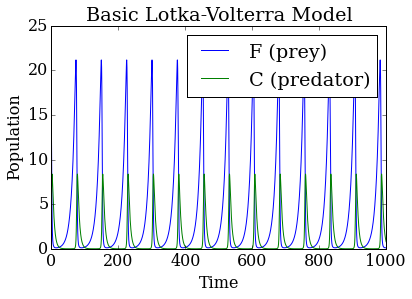

In [5]:
basic=runge_kutta_explicit(lotka_volterra_basic,F_C,t)

pyplot.plot(t,basic)
pyplot.title('Basic Lotka-Volterra Model')
pyplot.xlabel('Time')
pyplot.ylabel('Population')
pyplot.legend(('F (prey)','C (predator)'))
pyplot.show()

<h1 style="font-family:garamond;"><font size="5">Logistic Form of the Lotka-Volterra Model</font></h1>

<img src="./files/lotka-volterra-prey-logistic-growth.PNG" alt=Lotka-Volterra Prey Logistic Growth Model align="middle"height="150" width="375">
<div style="font-family:times new roman;"><div align="center"><font size="2">Figure 5: The Logistic Form of the Lotka-Volterra Model<sup>[3]</sup></font></div>

<p style="font-family:garamond;"><font size="4">The pair of equations shown above are a development beyond the basic Lotka-Volterra model. This continuation accounts for the indefinite, exponential growth of prey in the absense of predators. Prey do not reproduce infinitely, but are naturally limited by their environment. The form of the Lotka-Volterra equations above implements a logistic growth equation by including a carrying capacity, "K". This implementation restricts the total prey population to the value "K".</font></p>

In [6]:
K_critical=mu/(epsilon*a)
K=10.0   #Prey carrying capacity of environment
def lotka_volterra_logistic(t,init):
    """Coupled Lotka-Volterra Equations, Modified
        Logistical Form--Prey Population does not grow exponentially
        
        Returns right-hand side of the system of equations
        
        Input:
        F_and_C--initial Prey Population (Food), initial Predator Population (Consumer) (F_C)
        """
    F,C=init
    d_F=(r*F)*(1-(F/K))-(a*F*C)
    d_C=(epsilon*a*F*C)-(mu*C)
    return np.array(([d_F, d_C]), dtype=float)

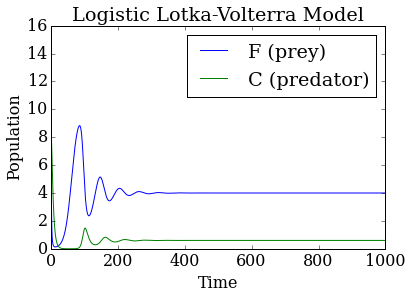

In [7]:
logistic=runge_kutta_explicit(lotka_volterra_logistic,F_C,t)

pyplot.plot(t,logistic)
pyplot.title('Logistic Lotka-Volterra Model')
pyplot.xlabel('Time')
pyplot.ylabel('Population')
pyplot.legend(('F (prey)','C (predator)'))
pyplot.show()

<h1 style="font-family:garamond;"><font size="5">The Rosenzweig-MacArthur Model</font></h1>

<img src="./files/rosenzweig-macarthur-equation-pair.PNG" alt=Rosenzweig-MacArthur Equation Pair align="middle"height="150" width="375">
<div style="font-family:times new roman;"><div align="center"><font size="2">Figure 6: The Rosenzweig-MacArthur Model<sup>[3]</sup></font></div>

<p style="font-family:garamond;"><font size="4">The Rosenzweig-MacArthur model, shown above, develops the mathematical model beyond the logistical form of the Lotka-Volterra equations. This continuation accounts for the unrealistic, insatiable appetite of the predatory species in the basic model. The Rosenzweig-MacArthur equations incorporate a predator type II functional response, accounting for a duration of time that a predator uses to consume prey that it has captured. This model accomplishes this by retarding the predatory birth rate and prey death rate based on the availabile prey population.</font></p>

In [8]:
h=2.0/3.0     #Time required for predator to feed, average
def rosenzweig_macarthur(t,init):
    """Coupled Lotka-Volterra Equations, Modified
        Incorporates type II predator to Logistical Form of Lotka-Volterra
        Type II predator-considers satiation of predators
        
        Returns right-hand side of the system of equations
        
        Input:
        F_and_C--initial Prey Population (Food), initial Predator Population (Consumer) (F_C)
        """
    F,C=init
    d_F=(r*F)*(1-(F/K))-(a*F*C)/(1+(a*h*F))
    d_C=(epsilon*a*F*C)/(1+a*h*F)-(mu*C)
    return np.array(([d_F, d_C]), dtype=float)

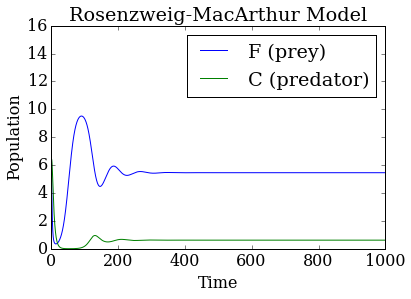

In [9]:
rosenz_mac=runge_kutta_explicit(rosenzweig_macarthur,F_C,t)

pyplot.plot(t,rosenz_mac)
pyplot.title('Rosenzweig-MacArthur Model')
pyplot.xlabel('Time')
pyplot.ylabel('Population')
pyplot.legend(('F (prey)','C (predator)'))
pyplot.show()

<h1 style="font-family:garamond;"><font size="5">Result: Temporal averages of the densities of the two populations</font></h1>

In [30]:
sum_b_prey=0.0
sum_b_predator=0.0
sum_l_prey=0.0
sum_l_predator=0.0
sum_rm_prey=0.0
sum_rm_predator=0.0
n_t=int(nt)
for i in range(n_t):
    sum_b_prey=sum_b_prey+basic[(i,0)]
    sum_b_predator=sum_b_predator+basic[(i,1)]
    sum_l_prey=sum_l_prey+basic[(i,0)]
    sum_l_predator=sum_l_predator+basic[(i,1)]
    sum_rm_prey=sum_rm_prey+basic[(i,0)]
    sum_rm_predator=sum_rm_predator+basic[(i,1)]

av_b_prey=sum_b_prey/n_t
av_l_prey=sum_l_prey/n_t
av_rm_prey=sum_rm_prey/n_t

av_b_predator=sum_b_predator/n_t
av_l_predator=sum_l_predator/n_t
av_rm_predator=sum_rm_predator/n_t

#Average values of each population: basic, logistic, and rosenz_mac
print(av_b_prey,av_l_prey,av_rm_prey)

print(av_b_predator,av_l_predator,av_rm_predator)

3.96383447973 3.96383447973 3.96383447973
1.04925377982 1.04925377982 1.04925377982


<h1 style="font-family:garamond;"><font size="5">Conclusion: Learning Exercise</font></h1>

<p style="font-family:garamond;"><font size="4">The Lotka-Volterra equations provide an extremely limited model of the population interaction of two species within an environment. As a conservative system, the model is structurally unstable. The model has been applied to few physical systems with realistic results, but some natural, oscillatory population exchanges have been studied and modeled. The basic form of the Lotka-Volterra equations, and their elaborated form as the Rosenzweig-MacArthur equations, have seen some use to describe particular populations. They have been used to explain the interactions of Canadian lynx and snowshoe hares, as results have yielded some comparison to the extensive fur catch records kept by the Hudson Bay Company.<sup>[4]</sup> Additionally, the model has been applied to moose and wolf populations in Isle Royale National Park.<sup>[7]</sup> The Lotka-Volterra equations provide a simple, elegant model to gain a preliminary understanding of population dynamics and also have potential use in the study of basic economic systems.</font></p>

<h1 style="font-family:garamond;"><font size="5">References</font></h1>

<p style="font-family:garamond;"><font size="4">[1] &#8594; Berryman, Alan. "The Origins and Evolution of Predator-Prey Theory." Ecology 73.5 (1992): 1530-535. Jstor.org. Ecological Society of America. Web. 15 Dec. 2015.</font></p>
<p style="font-family:garamond;"><font size="4">[2] &#8594; Sigmund, Karl. "Kolmogorov and Population Dynamics." Kolmogorov's Heritage in Mathematics. 1st ed. Springer, 2007. 177-186. Print.</font></p>
<p style="font-family:garamond;"><font size="4">[3] &#8594; de Roos, Andre M., (2014). Modeling population dynamics,[syllabus]. Institute for Biodiversity and Ecosystem Dynamics, Population Biology Section, University of Amsterdam, Amsterdam, The Netherlands.</font></p>
<p style="font-family:garamond;"><font size="4">[4] &#8594; Murray, J. D. "Models for Interacting Populations." Mathematical Biology. 3rd ed. New York: Springer, 2002. 79-89. Print.</font></p>
<p style="font-family:garamond;"><font size="4">[5] &#8594; Cooke, D. and Hiorns, R.W. et al., The Mathematical Theory of the Dynamics of Biological Populations II, Academic Press Inc., (1981)</font></p>
<p style="font-family:garamond;"><font size="4">[6] &#8594; Barker, Christopher A., (2009). Numerical methods for solving differential equations: the Runge-Kutta method,[project assignment]. ODE Laboratories, San Joaquin Delta College, Stockton, CA, USA.<http://calculuslab.deltacollege.edu/ODE/7-C-3/7-C-3-h.html></font></p>
<p style="font-family:garamond;"><font size="4">[7] &#8594; Jost, C., Devulder, G., Vucetich, J.A., Peterson, R., and Arditi, R., "The wolves of Isle Royale display scale-invariant satiation and density dependent predation on moose", J. Anim. Ecol., 74(5), 809–816 (2005).</font></p>